In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [50]:
data = pd.read_csv("../../data/processed/data_2.csv",
                   dtype = {
                            "expensa_id": "object",
                            "unidad_id": "object",
                            "propietario_id": "object",
                            "inquilino_id": "object",
                            "consorcio_id": "object",
                            "expensa_padre_id": "object",
                            "unidad_prop": "object",
                            "consorcio_id": "object",
                            "usuario_creador_id": "object",
                            "concepto_id": "object",
                            "mes": "object",
                            "anio": "object",
                            "unidad_denominacion":"object",
                            "consorcio_nombre": "object",
                            "version":"object",
                            "concepto_id": "object",
                            "unidad_tipo": "object",
                            "modo_pago": "object",
                            "forma_prorrateo": "object",
                            "tipo_prorrateo": "object",
                            "metodo_pago": "object",    
                            "venc_1_dayofweek": "object",
                            "venc_2_dayofweek": "object",
                            "venc_1_dayofweek_ant": "object",
                            "venc_2_dayofweek_ant": "object",
                            "dia_inicio_mes_vencimiento": "object"
                    },
                    parse_dates = ["fecha_vencimiento_1", "fecha_vencimiento_2"])

In [51]:
data.columns

Index(['expensa_id', 'unidad_id', 'propietario_id', 'inquilino_id',
       'fecha_vencimiento_1', 'fecha_vencimiento_2', 'monto', 'monto_total',
       'monto_parcial', 'expensa_padre_id', 'int_dia', 'int_mes', 'mes',
       'anio', 'unidad_denominacion', 'unidad_prop', 'consorcio_id',
       'consorcio_nombre', 'version', 'concepto_id', 'unidad_tipo',
       'modo_pago', 'forma_prorrateo', 'tipo_prorrateo', 'fecha_pago',
       'monto_pago', 'metodo_pago', 'fecha_expensa_x',
       'fecha_expensa_anterior', 'impago', 'pago_tardio_1', 'pago_tardio_2',
       'pago_tardio', 'tamanio_consorcio', 'fecha_expensa_y', 'cum_impago',
       'cum_pago_tardio', 'cum_pago_tardio_1', 'cum_pago_tardio_2',
       'venc_1_dayofweek', 'venc_1_day', 'venc_2_dayofweek', 'venc_2_day',
       'mes_vencimiento', 'dia_inicio_mes_vencimiento', 'fecha_expensa_x_ant',
       'venc_1_dayofweek_ant', 'venc_1_day_ant', 'venc_2_dayofweek_ant',
       'venc_2_day_ant', 'metodo_pago_ant', 'impago_ant', 'pago_tardio_

In [52]:
data = data[['expensa_id', 'unidad_id', 'unidad_denominacion', 'unidad_tipo',
             'consorcio_id', 'consorcio_nombre', 'forma_prorrateo', 'modo_pago', 'tamanio_consorcio',
             'fecha_expensa_x',
             'mes_vencimiento','dia_inicio_mes_vencimiento',
             'fecha_vencimiento_1', 'venc_1_dayofweek', 'venc_1_day',
             'fecha_vencimiento_2', 'venc_2_dayofweek', 'venc_2_day',             
             'monto', 'monto_total', 'monto_parcial', 
             'int_dia', 'int_mes', 
             'mes',  
             'version',        
             'impago', 'pago_tardio_1', 'pago_tardio_2', 'pago_tardio',
             'fecha_expensa_anterior', 
             'venc_1_dayofweek_ant', 'venc_1_day_ant', 
             'venc_2_dayofweek_ant', 'venc_2_day_ant', 
             'metodo_pago_ant', 
             'impago_ant', 'pago_tardio_ant', 'pago_tardio_1_ant', 'pago_tardio_2_ant', 
             'cum_impago_ant', 'cum_pago_tardio_ant', 'cum_pago_tardio_1_ant','cum_pago_tardio_2_ant']]

In [53]:
data.shape

(265956, 43)

In [54]:
data = data.dropna()

In [55]:
data.shape

(232171, 43)

In [56]:
data = data[data.fecha_expensa_x < "2019-01-01"]

In [57]:
def stacked_bar_plot(plot_data, bar_colum, prop_column):
    general_prop = plot_data[prop_column].sum()/plot_data.shape[0]
    plot_data = plot_data[["expensa_id",bar_colum, prop_column]].groupby([bar_colum, prop_column]).count().reset_index()
    plot_data = plot_data.pivot(index= bar_colum, columns= prop_column, values='expensa_id')
    plot_data["total"] = plot_data.sum(axis = 1)
    plot_data["False_prop"] = plot_data[False]/plot_data.total
    plot_data["True_prop"] = plot_data[True]/plot_data.total
    rows = list(plot_data.index)
    barWidth = 0.85
    plt.bar(rows, plot_data["True_prop"], color='#ffa100', edgecolor='white', width=barWidth)
    plt.bar(rows, plot_data["False_prop"], bottom=plot_data["True_prop"], color='#0569c6', edgecolor='white', width=barWidth)
    plt.legend([True, False])
    plt.hlines(general_prop, xmin = rows[0], xmax= rows[-1], linestyles="dashed")

## Modelo Impago

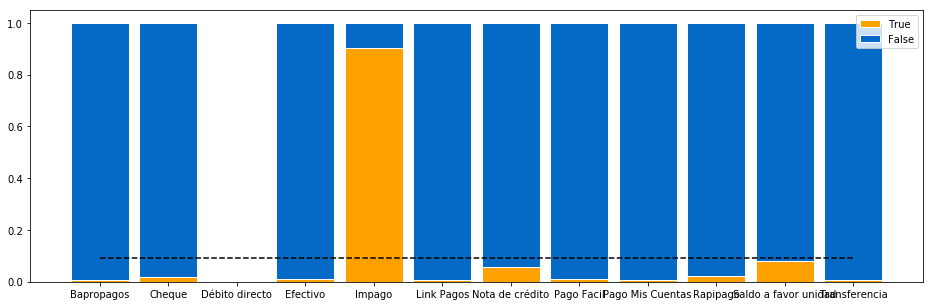

In [58]:
plt.figure(figsize=(16,5))
stacked_bar_plot(data, "metodo_pago_ant", "impago")

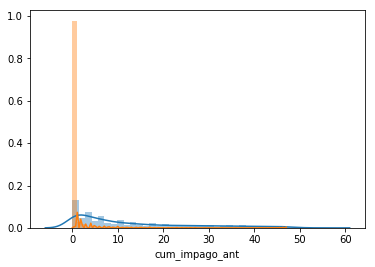

In [59]:
sns.distplot(data.loc[data.impago, "cum_impago_ant"])
sns.distplot(data.loc[~data.impago, "cum_impago_ant"])

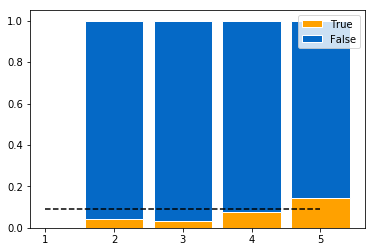

In [60]:
stacked_bar_plot(data, "tamanio_consorcio", "impago")

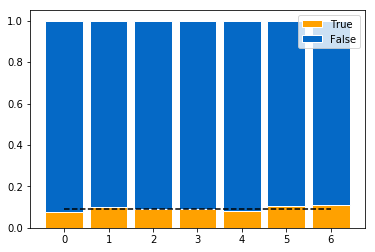

In [61]:
stacked_bar_plot(data, "venc_1_dayofweek", "impago")

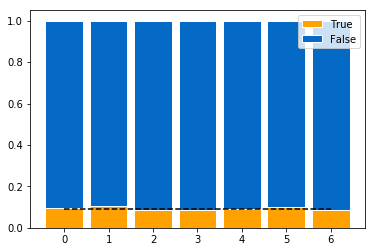

In [65]:
stacked_bar_plot(data, "dia_inicio_mes_vencimiento", "impago")

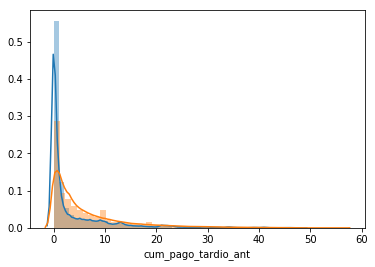

In [62]:
sns.distplot(data.loc[data.impago, "cum_pago_tardio_ant"])
sns.distplot(data.loc[~data.impago, "cum_pago_tardio_ant"])

In [47]:
data = data[data.fecha_expensa_x < "2019-01-01"].shape

In [116]:
data["mes_vencimiento"] = pd.to_datetime(data.mes_vencimiento).dt.month

In [117]:
x_columns = ['forma_prorrateo', 'modo_pago', 'tamanio_consorcio', 'dia_inicio_mes_vencimiento',
         'venc_1_dayofweek', 'venc_1_day',
         'venc_2_dayofweek', 'venc_2_day',             
         'monto', 'monto_total', 'monto_parcial', 
         'int_dia', 'int_mes', 'mes',  
         'version',        
         'venc_1_dayofweek_ant', 'venc_1_day_ant', 
         'venc_2_dayofweek_ant', 'venc_2_day_ant', 
         'metodo_pago_ant', 'pago_tardio_ant', 'pago_tardio_1_ant', 'pago_tardio_2_ant', 
         'cum_impago_ant', 'cum_pago_tardio_ant', 'cum_pago_tardio_1_ant','cum_pago_tardio_2_ant']

In [118]:
X = data[x_columns]
X = pd.get_dummies(X)

In [84]:
X_train = X.loc[data.fecha_expensa_x < "2018-09-01", :]
X_test = X.loc[data.fecha_expensa_x >= "2018-09-01", :]
Y_train = data.loc[data.fecha_expensa_x < "2018-09-01", "impago"]
Y_test = data.loc[data.fecha_expensa_x >= "2018-09-01", "impago"]

In [85]:
print("X Train shape:", X_train.shape)
print("Y Train shape:", Y_train.shape)
print("X Test shape:", X_test.shape)
print("Y test shape:", Y_test.shape)

X Train shape: (160068, 147)
Y Train shape: (160068,)
X Test shape: (42126, 147)
Y test shape: (42126,)


In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01],
    "n_estimators": [128,256,512],
}

xgb = GridSearchCV(
    estimator = XGBClassifier(verbosity=2, n_jobs=-1),
    param_grid = param_grid,   
    scoring = "f1",
    cv = 5,
    verbose = 2,
    return_train_score = True,
    n_jobs = -1
)

In [89]:
xgb.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 54.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbosity=2),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01], 'n_estimators': [128, 256, 512]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=2)

In [90]:
xgb.score(X_train, Y_train)

0.8890587464511902

In [93]:
xgb.best_estimator_.save_model("../../models/xgb_impago")

In [98]:
xgb.best_estimator_.max_depth

3

In [99]:
xgb.best_estimator_.learning_rate

0.01

In [100]:
xgb.best_estimator_.n_estimators

256

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confusion_matrix(Y_test, xgb.predict(X_test))

array([[37181,   235],
       [  969,  3741]], dtype=int64)

In [96]:
importances = pd.DataFrame({
    "variable": X.columns,
    "importance": xgb.best_estimator_.feature_importances_
})

In [106]:
print("accuracy",accuracy_score(Y_train, xgb.predict(X_train)))
print("precision",precision_score(Y_train, xgb.predict(X_train)))
print("recall",recall_score(Y_train, xgb.predict(X_train)))

accuracy 0.9809580928105555
precision 0.9023939707403577
recall 0.8761119081779053


In [105]:
print("accuracy",accuracy_score(Y_test, xgb.predict(X_test)))
print("precision",precision_score(Y_test, xgb.predict(X_test)))
print("recall",recall_score(Y_test, xgb.predict(X_test)))

accuracy 0.9714190761050183
precision 0.9408953722334004
recall 0.7942675159235669


In [97]:
importances.sort_values("importance", ascending=False)

,variable,importance
10,cum_impago_ant,0.376543
133,metodo_pago_ant_Impago,0.158810
12,cum_pago_tardio_1_ant,0.134119
16,modo_pago_mes_adelantado,0.106622
7,int_mes,0.096521
143,pago_tardio_1_ant_False,0.043771
29,mes_vencimiento_2015-03-01,0.026375
1,venc_1_day,0.022447
4,monto_total,0.010662
13,cum_pago_tardio_2_ant,0.007856


In [107]:
xgb_pago_tardio = XGBClassifier(
   max_depth = 3,
   n_estimators = 256,
   learning_rate = 0.01)

In [108]:
data_pago_tardio = data.pago_tardio | data.impago

In [111]:
data_pago_tardio.sum() / len(data_pago_tardio)

0.4522735590571431

In [119]:
X_train = X.loc[data.fecha_expensa_x < "2018-09-01", :]
X_test = X.loc[data.fecha_expensa_x >= "2018-09-01", :]

Y_train = data_pago_tardio.loc[data.fecha_expensa_x < "2018-09-01"]
Y_test = data_pago_tardio.loc[data.fecha_expensa_x >= "2018-09-01"]

In [120]:
xgb_pago_tardio.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=256,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
confusion_matrix(Y_test, xgb_pago_tardio.predict(X_test))

array([[20676,  3613],
       [ 4539, 13298]], dtype=int64)

In [123]:
print("accuracy",accuracy_score(Y_train, xgb_pago_tardio.predict(X_train)))
print("precision",precision_score(Y_train, xgb_pago_tardio.predict(X_train)))
print("recall",recall_score(Y_train, xgb_pago_tardio.predict(X_train)))

accuracy 0.7893707674238448
precision 0.783897641717547
recall 0.7482543132726531


In [125]:
print("accuracy",accuracy_score(Y_test, xgb_pago_tardio.predict(X_test)))
print("precision",precision_score(Y_test, xgb_pago_tardio.predict(X_test)))
print("recall",recall_score(Y_test, xgb_pago_tardio.predict(X_test)))

accuracy 0.8064853059868015
precision 0.7863520785287682
recall 0.745528956663116


In [126]:
importances_pago_tardio = pd.DataFrame({
    "variable": X.columns,
    "importance": xgb_pago_tardio.feature_importances_
})

In [128]:
importances_pago_tardio.sort_values("importance", ascending=False)

,variable,importance
11,cum_pago_tardio_ant,0.140625
13,cum_pago_tardio_2_ant,0.120536
75,metodo_pago_ant_Impago,0.113281
83,pago_tardio_ant_False,0.102121
10,cum_impago_ant,0.074219
7,int_mes,0.071429
74,metodo_pago_ant_Efectivo,0.066964
31,venc_1_dayofweek_6,0.042411
12,cum_pago_tardio_1_ant,0.041295
85,pago_tardio_1_ant_False,0.031808


In [129]:
data_pago_tardio = data.pago_tardio
data_pago_tardio.sum() / len(data_pago_tardio)

0.36003541153545604

In [130]:
xgb_pago_tardio = XGBClassifier(
   max_depth = 3,
   n_estimators = 256,
   learning_rate = 0.01)

X_train = X.loc[data.fecha_expensa_x < "2018-09-01", :]
X_test = X.loc[data.fecha_expensa_x >= "2018-09-01", :]

Y_train = data_pago_tardio.loc[data.fecha_expensa_x < "2018-09-01"]
Y_test = data_pago_tardio.loc[data.fecha_expensa_x >= "2018-09-01"]

xgb_pago_tardio.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
confusion_matrix(Y_test, xgb_pago_tardio.predict(X_test))

array([[25141,  3858],
       [ 4578,  8549]], dtype=int64)

In [131]:
print("accuracy",accuracy_score(Y_train, xgb_pago_tardio.predict(X_train)))
print("precision",precision_score(Y_train, xgb_pago_tardio.predict(X_train)))
print("recall",recall_score(Y_train, xgb_pago_tardio.predict(X_train)))

accuracy 0.7916760376839843
precision 0.742832367809306
recall 0.6747611865258925


In [132]:
print("accuracy",accuracy_score(Y_test, xgb_pago_tardio.predict(X_test)))
print("precision",precision_score(Y_test, xgb_pago_tardio.predict(X_test)))
print("recall",recall_score(Y_test, xgb_pago_tardio.predict(X_test)))

accuracy 0.7997436262640649
precision 0.6890465060046748
recall 0.6512531423783042


In [133]:
importances_pago_tardio = pd.DataFrame({
    "variable": X.columns,
    "importance": xgb_pago_tardio.feature_importances_
})

importances_pago_tardio.sort_values("importance", ascending=False)

,variable,importance
11,cum_pago_tardio_ant,0.214286
13,cum_pago_tardio_2_ant,0.113839
83,pago_tardio_ant_False,0.113281
74,metodo_pago_ant_Efectivo,0.099330
75,metodo_pago_ant_Impago,0.092634
7,int_mes,0.059152
1,venc_1_day,0.054129
85,pago_tardio_1_ant_False,0.047991
31,venc_1_dayofweek_6,0.046317
4,monto_total,0.027902
